In [12]:
import datajoint as dj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from microns_phase3 import nda, utils


Connecting microns@db.datajoint.com:3306


In [3]:
unit_key = {'session': 4, 'scan_idx': 7, 'unit_id':1262}
#Select the movie trials in the appropiate session and scan
trial_key = {'session': 4, 'scan_idx': 7}
trial_info = nda.Trial & trial_key

In [5]:
endids = trial_info.fetch('end_idx')

In [7]:
np.max(endids)

31990

In [9]:
movie = (nda.Stimulus & trial_key).fetch1('movie') # stimulus images synchronized with nda.ScanTimes
movie.shape #(height x width x frames)

/usr/local/lib/python3.9/site-packages/datajoint/connection.py:219: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


(90, 160, 40000)

In [22]:
stimulus_trial_slice = movie[:,:,slice(31995, 40000)] # slice movie according to indices of trial
stimulus_trial_slice.shape

(90, 160, 8005)

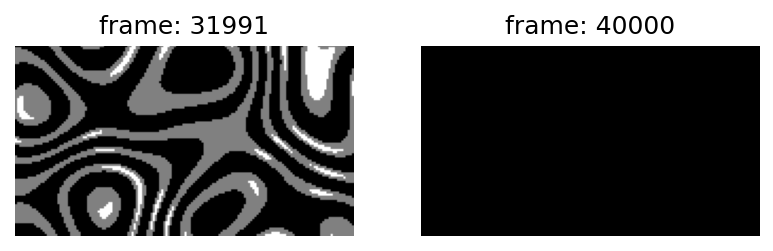

In [23]:
fig, axs = plt.subplots(1, 2, dpi=150) # view first and last frame of movie slice
axs[0].imshow(stimulus_trial_slice[:,:,0], cmap='gray')
axs[0].set_title(f'frame: {31991}')
axs[1].imshow(stimulus_trial_slice[:,:,-1], cmap='gray')
axs[1].set_title(f'frame: {40000}')
[ax.axis('off') for ax in axs];

In [49]:
trial_info* nda.Monet2

session Session ID,scan_idx Scan ID,trial_idx index of trial within stimulus,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),type type of stimulus trial,start_idx index of field 1 scan frame at start of trial,end_idx index of field 1 scan frame at end of trial,start_frame_time start time of stimulus frame relative to scan start (seconds),end_frame_time end time of stimulus frame relative to scan start (seconds),stim_times full vector of stimulus frame times relative to scan start (seconds),fps display refresh rate,duration (s) trial duration,rng_seed random number generator seed,"blue_green_saturation 0 = grayscale, 1=blue/green",pattern_width width of generated pattern,pattern_aspect the aspect ratio of generated pattern,"temp_kernel temporal kernel type (hamming, half-hamming)",temp_bandwidth (Hz) temporal bandwidth of the stimulus,ori_coherence 1=unoriented noise. pi/ori_coherence = bandwidth of orientations.,ori_fraction fraction of stimulus with coherent orientation vs unoriented,ori_mix mixin-coefficient of orientation biased noise,n_dirs number of directions,speed (units/s) where unit is display width,directions computed directions of motion in degrees,onsets computed direction onset (seconds),movie rendered uint8 movie (H X W X 1 X T)
4,7,6,DKYV7TrfEl+C8nvadH+1,stimulus.Monet2,435,529,69.11870193481445,84.10179495811462,=BLOB=,60.000,15.000,4407.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,7,+rgSVBVRE8Ij1WNhq8ZW,stimulus.Monet2,530,624,84.18511772155762,99.16820192337036,=BLOB=,60.000,15.000,2.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,8,GHn0W57E+2PS+Qr5yD2r,stimulus.Monet2,625,719,99.25153255462646,114.23461866378784,=BLOB=,60.000,15.000,8.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,9,u0ftbdrw9UHzSHDe1o4f,stimulus.Monet2,720,814,114.31795263290405,129.30104398727417,=BLOB=,60.000,15.000,1193.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,88,WdUz9wrTqcT0KJgVrQeF,stimulus.Monet2,6138,6232,974.5038266181946,989.4869055747986,=BLOB=,60.000,15.000,3935.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,89,CJhwNJFKI+lyFVQSBCsh,stimulus.Monet2,6233,6327,989.5535707473755,1004.5366566181183,=BLOB=,60.000,15.000,4566.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,90,SzeVJsDzE+Ceeb3XK4TT,stimulus.Monet2,6328,6422,1004.6199896335602,1019.6030766963959,=BLOB=,60.000,15.000,5.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,91,WD0uyxvusJmVxfeKu9mZ,stimulus.Monet2,6423,6517,1019.6864087581635,1034.6694955825806,=BLOB=,60.000,15.000,1.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,98,YLuStB2eXkgOS+Cescsy,stimulus.Monet2,6898,6992,1095.1685090065002,1110.1516036987305,=BLOB=,60.000,15.000,9.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=
4,7,99,gnsVaYRshZj1q1gqKWom,stimulus.Monet2,6993,7087,1110.2349276542664,1125.2180156707764,=BLOB=,60.000,15.000,8213.0,0.000,72,1.7,hamming,4.00,2.50,1.0,1.0,16,0.2,=BLOB=,=BLOB=,=BLOB=


In [50]:
dirs = (trial_info* nda.Monet2).fetch('directions')


In [51]:
dirs[0]

array([[ 90. , 315. , 157.5,  22.5, 180. , 135. , 292.5, 270. , 247.5,
        202.5, 337.5,   0. ,  45. ,  67.5, 225. , 112.5]])

In [35]:
nda.Activity() & unit_key

session Session ID,scan_idx Scan ID,unit_id unique per scan,trace spike trace
8,7,1,=BLOB=
8,7,2,=BLOB=
8,7,3,=BLOB=
8,7,4,=BLOB=
8,7,5,=BLOB=
8,7,6,=BLOB=
8,7,7,=BLOB=
8,7,8,=BLOB=
8,7,9,=BLOB=
8,7,10,=BLOB=


In [52]:
spike_trace = (nda.Activity() & unit_key).fetch1('trace')

In [54]:
spike_trace.shape

(40000,)

In [46]:
#Extract start and end frames these have the same shape as the dirs matrix, ntrials
#each item is the start or end id
s = (trial_info * nda.Monet2).fetch('start_idx')
e = (trial_info * nda.Monet2).fetch('end_idx')

In [14]:
s, e

(array([  435,   530,   625,   720,  6138,  6233,  6328,  6423,  6898,
         6993,  7088,  7183,  9939, 10034, 10129, 10223, 14122, 14217,
        14312, 14407, 16784, 16878, 16973, 17068, 17163, 17258, 17353,
        17448, 18684, 18779, 18874, 18968, 22487, 22582, 22676, 22771,
        22866, 22961, 23056, 23151]),
 array([  529,   624,   719,   814,  6232,  6327,  6422,  6517,  6992,
         7087,  7182,  7277, 10033, 10128, 10222, 10317, 14216, 14311,
        14406, 14501, 16877, 16972, 17067, 17162, 17257, 17352, 17447,
        17542, 18778, 18873, 18967, 19062, 22581, 22675, 22770, 22865,
        22960, 23055, 23150, 23244]))

In [16]:
onsets = (trial_info * nda.Monet2).fetch('onsets')

In [22]:
np.diff(onsets[0])

array([[0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375,
        0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375]])

In [23]:
onsets[0]

array([[ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ,  4.6875,  5.625 ,
         6.5625,  7.5   ,  8.4375,  9.375 , 10.3125, 11.25  , 12.1875,
        13.125 , 14.0625]])